In [ ]:
from __future__ import division
matplotlib.use('Agg')
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math as m
from matplotlib import colors

Funkcje do zaimplementowania:

In [ ]:
# Liczba próbek w gradiencie
samples = 1024

#Lista punktów tworząca odcinki na sześcianie
rgbBw = [[0,0,0], [1,1,1]]
rgbGbr = [[0,1,0],[0,0,1],[1,0,0]]
rgbGbrFull = [[0,1,0],[0,1,1],[0,0,1],[1,0,1],[1,0,0]]
rgbWbCustom = [[1,1,1],[1,0,1],[0,0,1],[0,1,1],[0,1,0],[1,1,0],[1,0,0],[0,0,0]]

#Lista punktów tworzących odcinki na stożku
hsvBw = [[0,0,0],[0,0,1]]
hsvGBR = [[120,1,1],[180,1,1],[240,1,1],[300,1,1],[360,1,1]]
hsvUnkown = [[120,0.5,1],[60,0.5,1],[0,0.5,1]]
hsvCustom = [[0,1,1],[120,0.9,1],[180,0.7,1],[240,0.5,1],[300,0.3,1],[310,0,1]]

#konwerter: nie trzeba implementowaÄ samemu, moĹźna wykorzystaÄ funkcjÄ z bilbioteki
def hsv2rgb(h, s, v):
    vs = v * s
    if h > 0:
        while h > 360:
            h -= 360
    else:
        while h < 0:
            h += 360
    hue = h/60
    x = vs * (1 - abs((hue % 2) - 1))
    
    # W zależności od tego w jakiej części okręgu znajduje się kolor
    switcher = {
        0: [vs,x,0],
        1: [x,vs,0],
        2: [0,vs,x],
        3: [0,x,vs],
        4: [x,0,vs],
        5: [vs,0,x],
        6: [vs,x,0]
    }
    rgb = switcher.get(m.trunc(hue),[0,0,0])
    match = v - vs
    rgb = [i+match for i in rgb]
    return rgb


def getElement(listPoints, point):
    element = m.trunc(point * (len(listPoints) - 1))
    if element == len(listPoints) - 1:
        element = len(listPoints) - 2
    skala = point * (len(listPoints) - 1) - element
    return element, skala

#funkcja sprawdza w jakim miejscu sześcianu znajduje się punkt na podstawie listy odcinków
def gradient_rgb_bw(rgbBw, v):
    # Sprawdzanie, na którym odcinku znajduje się punkt
    element, skala = getElement(rgbBw, v)
    finalPoint = []
    for i in range(len(rgbBw[element])):
        lewyZakres = rgbBw[element][i] # lewy koniec odcinka
        prawyZakres = rgbBw[element + 1][i] # prawy koniec odcinka
        div = prawyZakres - lewyZakres
        if div != 0:
            finalPoint.append(lewyZakres + (1 / div) * skala) # Na podstawie wzoru Talesa
        else:
            finalPoint.append(lewyZakres) # Uniknięcie dzielenia przez 0
    return finalPoint


def gradient_rgb_gbr(rgbGbr, v):
    # Sprawdzanie, na którym odcinku znajduje się punkt
    element, skala = getElement(rgbGbr, v)
    finalPoint = []
    for i in range(len(rgbGbr[element])):
        lewyZakres = rgbGbr[element][i] # lewy koniec odcinka
        prawyZakres = rgbGbr[element + 1][i] # prawy koniec odcinka
        div = prawyZakres - lewyZakres
        if div != 0:
            finalPoint.append(lewyZakres + (1 / div) * skala) # Na podstawie wzoru Talesa
        else:
            finalPoint.append(lewyZakres) # Uniknięcie dzielenia przez 0
    return finalPoint



def gradient_rgb_gbr_full(rgbGbrFull, v):
    # Sprawdzanie, na którym odcinku znajduje się punkt
    element, skala = getElement(rgbGbrFull, v)
    finalPoint = []
    for i in range(len(rgbGbrFull[element])):
        lewyZakres = rgbGbrFull[element][i] # lewy koniec odcinka
        prawyZakres = rgbGbrFull[element + 1][i] # prawy koniec odcinka
        div = prawyZakres - lewyZakres
        if div != 0:
            finalPoint.append(lewyZakres + (1 / div) * skala) # Na podstawie wzoru Talesa
        else:
            finalPoint.append(lewyZakres) # Uniknięcie dzielenia przez 0
    return finalPoint
    
    
def gradient_rgb_wb_custom(rgbWbCustom, v):
    # Sprawdzanie, na którym odcinku znajduje się punkt
    element, skala = getElement(rgbWbCustom, v)
    finalPoint = []
    for i in range(len(rgbWbCustom[element])):
        lewyZakres = rgbWbCustom[element][i] # lewy koniec odcinka
        prawyZakres = rgbWbCustom[element + 1][i] # prawy koniec odcinka
        div = prawyZakres - lewyZakres
        if div != 0:
            finalPoint.append(lewyZakres + (1 / div) * skala) # Na podstawie wzoru Talesa
        else:
            finalPoint.append(lewyZakres) # Uniknięcie dzielenia przez 0
    return finalPoint


def gradient_hsv_bw(hsvBw, v):
    element,skala = getElement(hsvBw, v)
    finalPoint = []
    for i in range(len(hsvBw[element])):
        lewyZakres = hsvBw[element][i] #lewy koniec odcinka
        prawyZakres = hsvBw[element + 1][i] #prawy koniec odcinka
        div = prawyZakres - lewyZakres
        finalPoint.append(lewyZakres + div * skala)
    return hsv2rgb([finalPoint[0], finalPoint[1], finalpoint[2])


def gradient_hsv_gbr(hsvGBR, v):
    element,skala = getElement(hsvGBR, v)
    finalPoint = []
    for i in range(len(hsvGBR[element])):
        lewyZakres = hsvGBR[element][i] #lewy koniec odcinka
        prawyZakres = hsvGBR[element + 1][i] #prawy koniec odcinka
        div = prawyZakres - lewyZakres
        finalPoint.append(lewyZakres + div * skala)
    return hsv2rgb([finalPoint[0], finalPoint[1], finalpoint[2])

def gradient_hsv_unknown(hsvUnknown, v):
    element,skala = getElement(hsvUnknown, v)
    finalPoint = []
    for i in range(len(hsvUnknown[element])):
        lewyZakres = hsvUnknown[element][i] #lewy koniec odcinka
        prawyZakres = hsvUnknown[element + 1][i] #prawy koniec odcinka
        div = prawyZakres - lewyZakres
        finalPoint.append(lewyZakres + div * skala)
    return hsv2rgb([finalPoint[0], finalPoint[1], finalpoint[2])


def gradient_hsv_custom(hsvCustom, v):
    element,skala = getElement(hsvCustom, v)
    finalPoint = []
    for i in range(len(hsvCustom[element])):
        lewyZakres = hsvCustom[element][i] #lewy koniec odcinka
        prawyZakres = hsvCustom[element + 1][i] #prawy koniec odcinka
        div = prawyZakres - lewyZakres
        finalPoint.append(lewyZakres + div * skala)
    return hsv2rgb([finalPoint[0], finalPoint[1], finalpoint[2])
    return hsv2rgb(0, 0, 0)

In [3]:
def plot_color_gradients(gradients, names):
    rc('legend', fontsize=10)
    column_width_pt = 400
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch
    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)
        
        # wizualizacja z interpolacją
        # im = ax.imshow(img, aspect='auto')
        # Interpolacja została wyłączona, żeby lepiej zwizualizować zmiany w liczbie próbek
        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')
    plt.close()

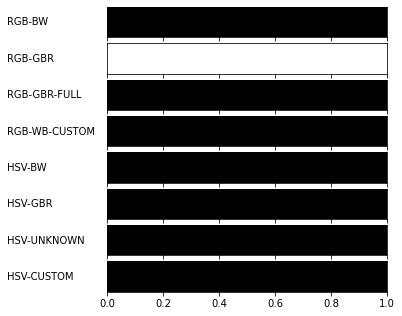

In [16]:
def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()
    
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

plot_color_gradients(gradients, [toname(g) for g in gradients])